In [62]:
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # plot_confusion_matrix
import matplotlib.pyplot as plt 
 

In [63]:
data_import = pd.read_csv(r'C:\Users\Bananberg\datasets\clothing_size.csv')
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [64]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


## Vad spelar den förlorade datan för roll här? kommer den påverka modeller på något sätt? 

# DATA CLEANING 

### VI tar bort all missing value för säkerhets skull 

In [65]:
data_step_one = data_import.copy() # nu finns kopian av data_import i data_step_one 
data_step_one = data_step_one.dropna(axis=0)

droped_rows = len(data_import) - len(data_step_one)
droped_rows

581

In [66]:
data_step_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119153 non-null  int64  
 1   age     119153 non-null  float64
 2   height  119153 non-null  float64
 3   size    119153 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.5+ MB


### Nu har vi ett jämt och fint dataset men vad var det som gjotde den så jämn? 

In [67]:
data_import["size"].value_counts()  # kom ihåg att Detta visar en column. för att bli av med XX L måste vi radera individuella rader. 

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

### Vi tar också bort XXL eftersom den har så lite data. 

In [68]:
data_step_one = data_step_one[data_step_one["size"] != "XXL"]
data_step_one["size"].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
Name: size, dtype: int64

# DATA PREPERATIONS

#### SPLIT!! 

In [69]:
X = data_step_one[["weight", "age", "height"]] # vad som ska prediktera y 
y = data_step_one["size"] # Vad jag vill prediktiera 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PIPELINING? Small first run

In [71]:
def decision_tree_run(depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth) # instansiate the model. 

    tree_clf.fit(X_train, y_train) # fitting the model "training it"


    return tree_clf.score(X_test, y_test) # and testing it on test set. 
decision_tree_run(None)

0.5088802116135533

#### Då testar vi med flera decision trees för att se vilket som blir bäst. 
#### Detta kallar vi:
# ENSAMBLE LEARNING 

### Vi testar att ändra hyperparametarna och testa fler trän med olka hyperparametrar

In [72]:
accuracy = [] # en tom lista att lägga score i 
tree_depth = list(range(2,100,3))  # 3 olika max depth på parametern i decision tree modellen. 

#### En loop som testar de här 3 nya hyperparameterna 

In [73]:
# Här skapas en funktion som kör alla hyperparametrar i tree_depth variabeln och spar accuracyn i accuracy 

for i in tree_depth:
    accuracy.append(decision_tree_run(i))
accuracy

[0.4409875299156065,
 0.5012386110761221,
 0.5105596842591427,
 0.5144644581601377,
 0.5100978292816056,
 0.508628290716715,
 0.5089641852458328,
 0.5091741193265314,
 0.5090061720619725,
 0.5090061720619725,
 0.5089641852458328,
 0.5091741193265314,
 0.5088802116135533,
 0.509090145694252,
 0.5089221984296931,
 0.5090061720619725,
 0.5087962379812738,
 0.5091321325103917,
 0.5090481588781123,
 0.5087122643489944,
 0.5090061720619725,
 0.5090481588781123,
 0.5088382247974136,
 0.5088802116135533,
 0.5090061720619725,
 0.5093420665910904,
 0.5088802116135533,
 0.5090481588781123,
 0.5089641852458328,
 0.5088382247974136,
 0.5088382247974136,
 0.5088382247974136,
 0.5090481588781123]

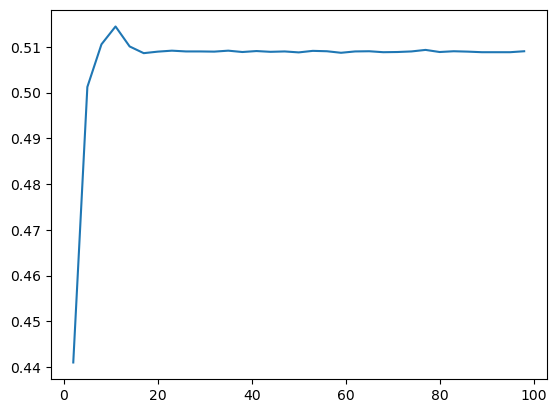

In [74]:
            # X         Y       Denna plot visar vilket djup som var bäst på ett ungefär. Vi kan se att mellan 0-20 gav best resultat. 
plt.plot(tree_depth, accuracy)  #  Jag skulle säga att ett djup på 10-15 kanske är det som gav 51 % accuracy. 

#### Funktionen nedan är lite konstig för den ber mig hämta tree_clf men den går inte att hitta... den ligger inne i en funktion men går inte att kalla här för att skapa en matrix... Vad kan problemet vara?

In [81]:
# confusion_matrix(y_test, tree_clf.predict(X_test).tolist(), labels=y_test.unique())

## En cool funktion med decision tree är att man kan printa ut hela trädet i en browser eller spara ner den. 

## V igör detta lite snabbt på Iris datasetttet 

In [76]:
iris = load_iris()
X = iris.data[:,2:] # pethal length and with 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [79]:
export_graphviz(
    tree_clf, 
    out_file=image_path("iris_tree.dot"), # någt finka inte här .. .ska undersöka någon gång. .
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

NameError: name 'image_path' is not defined